In [2]:
import numpy as np
import matplotlib.pyplot as plt
import argparse
import sys
np.random.seed(42)

In [3]:
# 1. Linearly Classifiable Data ( don't worry about this function too much )
def generate_linearly_classifiable_data(samples=100):
    points=-10+20*np.random.rand(samples, 2)
    line_hinge_point=-10+20*np.random.rand(2)
    slope=np.random.rand()*4-2  #-2 to 2 slope
    positive_points=[]
    negative_points=[]
    labels=(points[:,1]>slope*(points[:,0]-line_hinge_point[0])+line_hinge_point[1]).astype(int)

    positive_points=points[labels==1]
    negative_points=points[labels==0]

    return positive_points, negative_points, line_hinge_point, slope


In [4]:
def generate_almost_linear(samples=200, noise_ratio=0.1):
    points=-10+20*np.random.rand(samples, 2)
    line_hinge_point=-10+20*np.random.rand(2)
    slope=np.random.rand()*4-2  #-2 to 2 slope

    labels=(points[:,1]>slope*(points[:,0]-line_hinge_point[0])+line_hinge_point[1]).astype(int)
    noise_count =int(noise_ratio*samples)
    noise_idx=np.random.choice(samples,noise_count,replace=False)
    labels[noise_idx] = 1 -labels[noise_idx]

    positive_points=points[labels==1]
    negative_points=points[labels==0]

    return positive_points, negative_points, line_hinge_point, slope

In [5]:
def plot_perceptron_decision_boundary(positive_points,negative_points,weights, bias, true_slope=None, true_hinge_point=None):
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_xticks(np.arange(-10, 11, 1))
    ax.set_yticks(np.arange(-10, 11, 1))
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for point in positive_points:
        ax.plot(point[0], point[1], 'go',markersize=1)
    for point in negative_points:
        ax.plot(point[0], point[1], 'ro',markersize=1)

    x_vals = np.array([-10, 10])
    y_vals = -(weights[0] * x_vals + bias) / weights[1]
    ax.plot(x_vals, y_vals, 'b--', linewidth=2, label='Decision Boundary')

    if true_slope is not None and true_hinge_point is not None:
        true_y_vals = true_slope * (x_vals - true_hinge_point[0]) + true_hinge_point[1]
        ax.plot(x_vals, true_y_vals, 'k-', linewidth=2, label='True Boundary')
    
    ax.legend()

In [6]:
def plot_data(positive_points, negative_points, line_hinge_point=None, slope=None):
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_xticks(np.arange(-10, 11, 1))
    ax.set_yticks(np.arange(-10, 11, 1))
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for point in positive_points:
        ax.plot(point[0], point[1], 'go',markersize=1)
    for point in negative_points:
        ax.plot(point[0], point[1], 'ro',markersize=1)



    if line_hinge_point is not None and slope is not None:
        x_vals = np.array([-10, 10])
        y_vals = slope * (x_vals - line_hinge_point[0]) + line_hinge_point[1]
        ax.plot(x_vals, y_vals, 'b--', linewidth=2, label='True Boundary')
    plt.show()

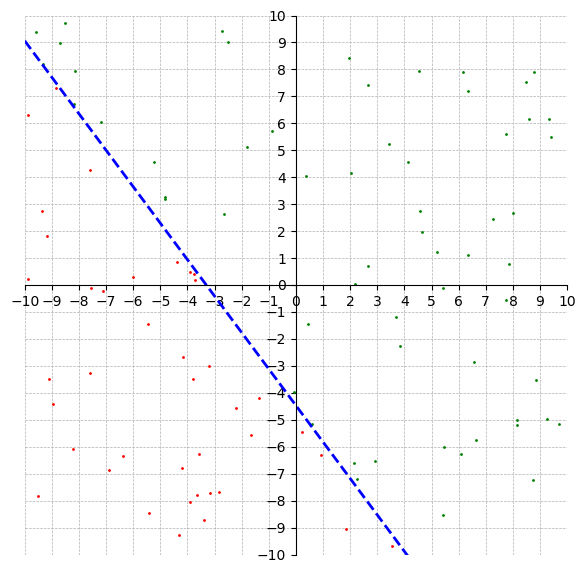

In [7]:
#Testing linearly classifiable
plot_data(*generate_linearly_classifiable_data(100))

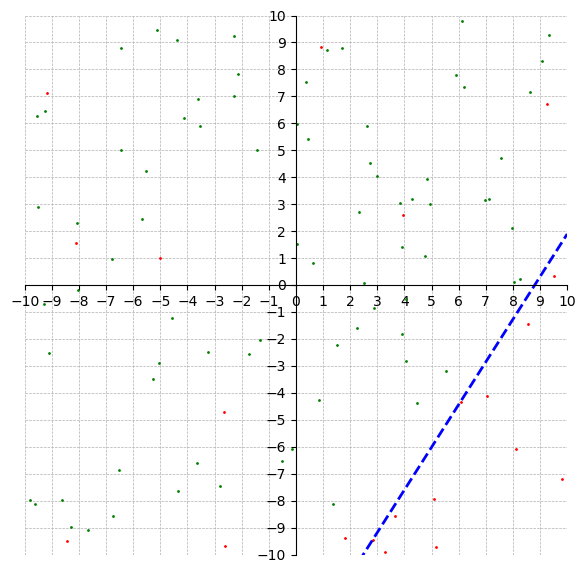

In [8]:
#Testing almost linear
plot_data(*generate_almost_linear(100))

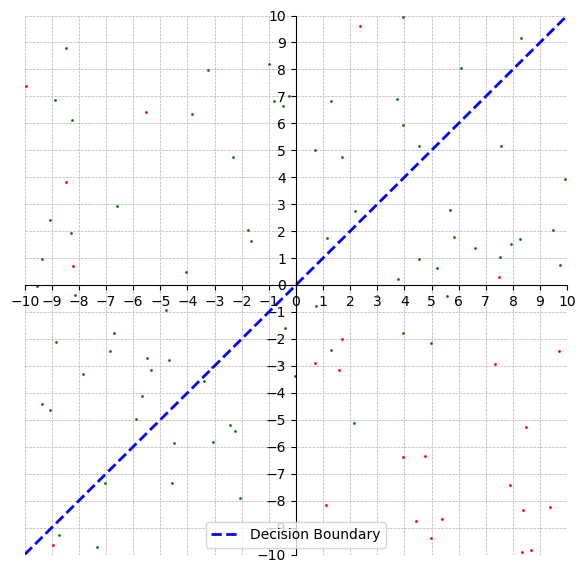

In [9]:
#Testing perceptron decision boundary plot
positive_points, negative_points, line_hinge_point, slope = generate_almost_linear(100)
plot_perceptron_decision_boundary(positive_points, negative_points, np.array([1, -1]), 0)

In [11]:
def perceptron_train(positive_points, negative_points, learning_rate=0.1, epochs=1000,real_hingepoint=None,real_slope=None,plot_every_n=100):
    pass
    # IMPLEMENT YOUR PERCEPTRON TRAINING CODE HERE.